# Fake News Detection

In [1]:
pwd

'C:\\Users\\Shamitha'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
import re
import string
import pickle

In [3]:
df_fake = pd.read_csv("E:\\isfcr project\\Fake.csv")
df_true = pd.read_csv("E:\\isfcr project\\True.csv")

In [4]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23444,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23445,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23446,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23447,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [7]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [8]:
df_fake["real/fake"] = "Fake"
df_true["real/fake"] = "Real"

In [9]:
df_fake.shape, df_true.shape

((23449, 5), (21417, 5))

In [10]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23448, 23438, -1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416, 21406, -1):
    df_true.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
#inplace=true coz v do not want another dataset to be returned, axis=0=>along a row

In [11]:
df_fake.shape, df_true.shape

((23439, 5), (21407, 5))

In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("E:\\isfcr project\\manual_testing.csv")
#axis=0 indicates concatenation along series or rows

In [13]:
df_merge = pd.concat([df_fake, df_true], axis = 0)
df_merge.head(10)

,title,text,subject,date,real/fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",Fake


In [14]:
df = df_merge.sample(frac = 1)
#sample() is a function from pandas, used to generate sample random row or column from the function(to shuffle)
#frac indicates the length of dataframe values to be returned , 1 indicates to return all values

In [15]:
df.head(10)

,title,text,subject,date,real/fake
15708,U.S. monitoring sanctions regime in response t...,DHAKA (Reuters) - The U.S. government will con...,worldnews,"November 4, 2017",Real
1453,WATCH: Morning Joe RIPS Trump For Leaking Cla...,Joe Scarborough is furious about Donald Trump ...,News,"May 16, 2017",Fake
4236,China reiterates opposition to South Korea's T...,BEIJING (Reuters) - China reiterated on Monday...,politicsNews,"April 17, 2017",Real
20456,U.N. to vote on new North Korea sanctions on M...,UNITED NATIONS (Reuters) - The U.N. Security C...,worldnews,"September 11, 2017",Real
4836,"Republicans revamp U.S. health bill, boost ben...",WASHINGTON (Reuters) - U.S. House Republicans ...,politicsNews,"March 19, 2017",Real
7108,Trump’s foundation says it violated 'self-deal...,(Reuters) - U.S. Republican President-elect Do...,politicsNews,"November 22, 2016",Real
1329,Trump Has Finally Commented On Portland Train...,Donald Trump doesn t particularly have a filte...,News,"May 30, 2017",Fake
11783,EMBARRASSING! NYC MAYOR DE BLASIO Can’t Tell T...,CNN s Jake Tapper raised the point that Obama ...,politics,"Jan 29, 2017",Fake
8025,Americans Tell Senate GOP To Let President Ob...,"Sorry, Republicans. The American people have s...",News,"February 18, 2016",Fake
11648,CLASS ACT! WATCH THE TODAY SHOW’S MATT LAUER G...,,politics,"Feb 15, 2017",Fake


In [16]:
df

,title,text,subject,date,real/fake
15708,U.S. monitoring sanctions regime in response t...,DHAKA (Reuters) - The U.S. government will con...,worldnews,"November 4, 2017",Real
1453,WATCH: Morning Joe RIPS Trump For Leaking Cla...,Joe Scarborough is furious about Donald Trump ...,News,"May 16, 2017",Fake
4236,China reiterates opposition to South Korea's T...,BEIJING (Reuters) - China reiterated on Monday...,politicsNews,"April 17, 2017",Real
20456,U.N. to vote on new North Korea sanctions on M...,UNITED NATIONS (Reuters) - The U.N. Security C...,worldnews,"September 11, 2017",Real
4836,"Republicans revamp U.S. health bill, boost ben...",WASHINGTON (Reuters) - U.S. House Republicans ...,politicsNews,"March 19, 2017",Real
...,...,...,...,...,...
13154,THIS WOMAN IS A HERO: Trump Surrogate Leads Fa...,Get to know this woman! Maria Espinoza founded...,politics,"Aug 27, 2016",Fake
17864,FRANCE’S INTERIOR MINISTER Makes INSANE Statem...,A man shouting Allahu Akbar has stabbed two ...,left-news,"Oct 1, 2017",Fake
17692,LOL! IVANKA TRUMP Has All-Female Security Deta...,When the daughter of President Trump visited J...,left-news,"Nov 4, 2017",Fake
874,Eric Trump Gives DUMBEST Defense For His Brot...,The White House is getting really nervous toda...,News,"July 11, 2017",Fake


In [17]:
df.shape

(44846, 5)

In [18]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
real/fake    0
dtype: int64

In [19]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text
#to remove unusual and irregular expressions in the text column
#sub is an built-in library to replace substring with another substring

In [20]:
df["text"] = df["text"].apply(word_drop)

In [21]:
df.head(100)

,title,text,subject,date,real/fake
15708,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,"November 4, 2017",Real
1453,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,News,"May 16, 2017",Fake
4236,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsNews,"April 17, 2017",Real
20456,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,"September 11, 2017",Real
4836,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsNews,"March 19, 2017",Real
...,...,...,...,...,...
11069,Sentencing of ex-House speaker Hastert delayed...,chicago reuters a federal judge on thursda...,politicsNews,"January 28, 2016",Real
6297,Woman Who Worked For Trump Warns “He HAS To B...,barbara res worked for seven years as the head...,News,"May 18, 2016",Fake
14750,French Journalist Hit With Huge Fine For “Inci...,americans should pay close attention to this s...,politics,"Dec 23, 2015",Fake
18985,"Two worlds of Labour, Britain's opposition par...",brighton england reuters a baby gurgles i...,worldnews,"September 26, 2017",Real


In [22]:
df.shape

(44846, 5)

In [23]:
def word(subject):
    subject = subject.lower()
    return subject
#converts all data in column subject to lowercase

In [24]:
df["subject"] = df["subject"].apply(word)

In [25]:
df.head(10)

,title,text,subject,date,real/fake
15708,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,"November 4, 2017",Real
1453,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,news,"May 16, 2017",Fake
4236,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsnews,"April 17, 2017",Real
20456,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,"September 11, 2017",Real
4836,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsnews,"March 19, 2017",Real
7108,Trump’s foundation says it violated 'self-deal...,reuters u s republican president elect do...,politicsnews,"November 22, 2016",Real
1329,Trump Has Finally Commented On Portland Train...,donald trump doesn t particularly have a filte...,news,"May 30, 2017",Fake
11783,EMBARRASSING! NYC MAYOR DE BLASIO Can’t Tell T...,cnn s jake tapper raised the point that obama ...,politics,"Jan 29, 2017",Fake
8025,Americans Tell Senate GOP To Let President Ob...,sorry republicans the american people have s...,news,"February 18, 2016",Fake
11648,CLASS ACT! WATCH THE TODAY SHOW’S MATT LAUER G...,,politics,"Feb 15, 2017",Fake


In [26]:
df.shape

(44846, 5)

In [27]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
real/fake    0
dtype: int64

In [28]:
df = df.drop_duplicates(subset = ['text','title','date'], keep = 'last').reset_index(drop = True)
#when drop=false(default value) a new dataframe is returned
#keep=last indicates that while dropping the duplicates last one is kept
#function of pandas

In [29]:
df

,title,text,subject,date,real/fake
0,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,"November 4, 2017",Real
1,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,news,"May 16, 2017",Fake
2,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsnews,"April 17, 2017",Real
3,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,"September 11, 2017",Real
4,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsnews,"March 19, 2017",Real
...,...,...,...,...,...
38824,THIS WOMAN IS A HERO: Trump Surrogate Leads Fa...,get to know this woman maria espinoza founded...,politics,"Aug 27, 2016",Fake
38825,FRANCE’S INTERIOR MINISTER Makes INSANE Statem...,a man shouting allahu akbar has stabbed two ...,left-news,"Oct 1, 2017",Fake
38826,LOL! IVANKA TRUMP Has All-Female Security Deta...,when the daughter of president trump visited j...,left-news,"Nov 4, 2017",Fake
38827,Eric Trump Gives DUMBEST Defense For His Brot...,the white house is getting really nervous toda...,news,"July 11, 2017",Fake


In [30]:
df.shape

(38829, 5)

In [31]:
df["date"]=df.date.str.replace(' ','-')

In [32]:
df.head(10)

,title,text,subject,date,real/fake
0,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,"November-4,-2017-",Real
1,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,news,"May-16,-2017",Fake
2,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsnews,"April-17,-2017-",Real
3,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,"September-11,-2017-",Real
4,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsnews,"March-19,-2017-",Real
5,Trump’s foundation says it violated 'self-deal...,reuters u s republican president elect do...,politicsnews,"November-22,-2016-",Real
6,Trump Has Finally Commented On Portland Train...,donald trump doesn t particularly have a filte...,news,"May-30,-2017",Fake
7,EMBARRASSING! NYC MAYOR DE BLASIO Can’t Tell T...,cnn s jake tapper raised the point that obama ...,politics,"Jan-29,-2017",Fake
8,Americans Tell Senate GOP To Let President Ob...,sorry republicans the american people have s...,news,"February-18,-2016",Fake
9,Obama pick to lead U.S. military in Africa fav...,washington reuters president barack obama ...,politicsnews,"June-21,-2016-",Real


In [33]:
df["date"]=df.date.str.replace(',','')

In [34]:
df.head(100)

,title,text,subject,date,real/fake
0,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,November-4-2017-,Real
1,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,news,May-16-2017,Fake
2,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsnews,April-17-2017-,Real
3,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,September-11-2017-,Real
4,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsnews,March-19-2017-,Real
...,...,...,...,...,...
95,White House says government shutdown always a ...,washington reuters as the u s congress wo...,politicsnews,December-5-2017-,Real
96,"Trump’s Biggest, Most Pansy-A** Apologist Now...",very few of donald trump s fans are more blind...,news,August-3-2016,Fake
97,Macedonia's pro-Western Social Democrats claim...,skopje reuters macedonia s ruling social d...,worldnews,October-15-2017-,Real
98,China urges Thailand to find Muslim Uighurs qu...,beijing reuters china said on tuesday it h...,worldnews,November-21-2017-,Real


In [35]:
df["date"]=df.date.str.replace(r'[-]$','', regex=True)
#regex=true indicates to replace for all regular expressions

In [36]:
df.head(10)

,title,text,subject,date,real/fake
0,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,November-4-2017,Real
1,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,news,May-16-2017,Fake
2,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsnews,April-17-2017,Real
3,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,September-11-2017,Real
4,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsnews,March-19-2017,Real
5,Trump’s foundation says it violated 'self-deal...,reuters u s republican president elect do...,politicsnews,November-22-2016,Real
6,Trump Has Finally Commented On Portland Train...,donald trump doesn t particularly have a filte...,news,May-30-2017,Fake
7,EMBARRASSING! NYC MAYOR DE BLASIO Can’t Tell T...,cnn s jake tapper raised the point that obama ...,politics,Jan-29-2017,Fake
8,Americans Tell Senate GOP To Let President Ob...,sorry republicans the american people have s...,news,February-18-2016,Fake
9,Obama pick to lead U.S. military in Africa fav...,washington reuters president barack obama ...,politicsnews,June-21-2016,Real


In [37]:
df["date"]=df.date.str.replace("January",'1')
df["date"]=df.date.str.replace("February",'2')
df["date"]=df.date.str.replace("Febraury",'2')
df["date"]=df.date.str.replace("March",'3')
df["date"]=df.date.str.replace("April",'4')
df["date"]=df.date.str.replace("May",'5')
df["date"]=df.date.str.replace("June",'6')
df["date"]=df.date.str.replace("July",'7')
df["date"]=df.date.str.replace("August",'8')
df["date"]=df.date.str.replace("September",'9')
df["date"]=df.date.str.replace("October",'10')
df["date"]=df.date.str.replace("November",'11')
df["date"]=df.date.str.replace("December",'12')

In [38]:
df.head(1000)

,title,text,subject,date,real/fake
0,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,11-4-2017,Real
1,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,news,5-16-2017,Fake
2,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsnews,4-17-2017,Real
3,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,9-11-2017,Real
4,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsnews,3-19-2017,Real
...,...,...,...,...,...
995,ANTIFA MANUAL FOUND On Evergreen College Campu...,this copy of the antifa manual that is used b...,left-news,Aug-19-2017,Fake
996,'Big Bang Theory' trumps TV audience for lates...,new york reuters some million americans ...,politicsnews,3-11-2016,Real
997,Texas Pastor Explains How She Can ‘Move Cloud...,texas christian pastor cindy jacobs stood in f...,news,1-14-2016,Fake
998,Unhinged Trump Supporter Holds Children AT GU...,if you had wanted to give trump supporters the...,news,11-4-2016,Fake


In [39]:
df["date"]=df.date.str.replace("Jan",'1')
df["date"]=df.date.str.replace("Feb",'2')
df["date"]=df.date.str.replace("Mar",'3')
df["date"]=df.date.str.replace("Apr",'4')
df["date"]=df.date.str.replace("Jun",'6')
df["date"]=df.date.str.replace("Jul",'7')
df["date"]=df.date.str.replace("Aug",'8')
df["date"]=df.date.str.replace("Sep",'9')
df["date"]=df.date.str.replace("Oct",'10')
df["date"]=df.date.str.replace("Nov",'11')
df["date"]=df.date.str.replace("Dec",'12')

In [40]:
df.head(100)

,title,text,subject,date,real/fake
0,U.S. monitoring sanctions regime in response t...,dhaka reuters the u s government will con...,worldnews,11-4-2017,Real
1,WATCH: Morning Joe RIPS Trump For Leaking Cla...,joe scarborough is furious about donald trump ...,news,5-16-2017,Fake
2,China reiterates opposition to South Korea's T...,beijing reuters china reiterated on monday...,politicsnews,4-17-2017,Real
3,U.N. to vote on new North Korea sanctions on M...,united nations reuters the u n security c...,worldnews,9-11-2017,Real
4,"Republicans revamp U.S. health bill, boost ben...",washington reuters u s house republicans ...,politicsnews,3-19-2017,Real
...,...,...,...,...,...
95,White House says government shutdown always a ...,washington reuters as the u s congress wo...,politicsnews,12-5-2017,Real
96,"Trump’s Biggest, Most Pansy-A** Apologist Now...",very few of donald trump s fans are more blind...,news,8-3-2016,Fake
97,Macedonia's pro-Western Social Democrats claim...,skopje reuters macedonia s ruling social d...,worldnews,10-15-2017,Real
98,China urges Thailand to find Muslim Uighurs qu...,beijing reuters china said on tuesday it h...,worldnews,11-21-2017,Real


In [41]:
import datetime as dt

In [42]:
df.info()
#prints the datatypes of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38829 entries, 0 to 38828
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      38829 non-null  object
 1   text       38829 non-null  object
 2   subject    38829 non-null  object
 3   date       38829 non-null  object
 4   real/fake  38829 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [43]:
df["date"]= pd.to_datetime(df["date"])

In [44]:
df.sort_values(by='date', inplace=True)
#not to return a new dataset

In [45]:
df.head(10)

,title,text,subject,date,real/fake
3957,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,just making room for hillary president obama t...,politics,2015-03-31,Fake
33406,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,the irony here isn t lost on us hillary is be...,politics,2015-03-31,Fake
30613,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,the gay mafia has a new corporate don this i...,politics,2015-03-31,Fake
1331,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,does anyone really think hillary clinton will ...,politics,2015-03-31,Fake
20399,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism to make your s...,politics,2015-03-31,Fake
31487,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,in case you missed it sen harry reid r nv ...,politics,2015-03-31,Fake
14003,“Non-violence hasn’t worked”…Reverend Sam Most...,yeah that whole taking up arms thing seems t...,left-news,2015-04-01,Fake
21177,MUSLIM WOMAN ARRESTED FOR SPITTING ON HER FELL...,this woman s having trouble entering the walma...,politics,2015-04-01,Fake
11134,IS ISIS IN DANGER OF BEING WIPED OUT BY A FLES...,try to fix that with a dull knife boys the sel...,politics,2015-04-02,Fake
11146,[VIDEO] 16 YR OLD ARRESTED For Violent Gang Be...,this is a sad commentary on a generation who h...,left-news,2015-04-04,Fake


In [46]:
df = df.reset_index(drop=True)
#when drop=false(default) a new dataframe is returned

In [47]:
df

,title,text,subject,date,real/fake
0,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,just making room for hillary president obama t...,politics,2015-03-31,Fake
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,the irony here isn t lost on us hillary is be...,politics,2015-03-31,Fake
2,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,the gay mafia has a new corporate don this i...,politics,2015-03-31,Fake
3,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,does anyone really think hillary clinton will ...,politics,2015-03-31,Fake
4,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism to make your s...,politics,2015-03-31,Fake
...,...,...,...,...,...
38824,BUSTED! Maxine Waters’ Ties to Black Nationali...,we reported that maxine waters and members of ...,politics,2018-02-18,Fake
38825,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,ami horowitz is fantastic check out this man ...,politics,2018-02-19,Fake
38826,MSNBC ANCHOR Flabbergasted at What Texas Teach...,if we protect every other government building ...,politics,2018-02-19,Fake
38827,Democrat Senator Warns Mueller Not To Release ...,according to the hill democrat senator bob ca...,politics,2018-02-19,Fake


In [48]:
final_df = df.to_csv("E:\\isfcr project\\final_df.csv")

In [49]:
#text-independent(x) real/fake-dependent(y)
x = df["text"]
y = df["real/fake"]

In [50]:
#splitting data into train and test sets out of which 0.2 percent of data is for testing
#train_test_split is a function in sklearn for splitting data sets into two sub-arrays randomly 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [51]:
x_train

14469    west palm beach  fla  washington  reuters    p...
37939    brussels  reuters    the belgian trial of a ke...
37722    brussels  reuters    european union leaders ga...
2595     michael moore made on appearance on the megyn ...
8130      century wire says this latest stunt only goes...
                               ...                        
20757    seoul  reuters    u s  vice president mike pen...
32103    taipei  reuters    taiwan and china need to dr...
30403    kobani  syria  reuters    islamic state fighte...
21243    washington  reuters    an extra   visas for af...
2732     washington  reuters    president barack obama ...
Name: text, Length: 31063, dtype: object

In [52]:
x_test

829      trump made sure everyone got a chance to see h...
29080    goma  democratic republic of congo  reuters   ...
30359    the numbers are in  and  megyn kelly today  is...
37322    moscow  reuters    former militants from  band...
13387    tune in to the alternate current radio network...
                               ...                        
17127    bill maher is definitely not afraid of donald ...
30282    the democratic national committee announced fr...
17206    beirut  reuters    a syrian christian orthodox...
10430    after all the backlash trump received for sayi...
16515                                                     
Name: text, Length: 7766, dtype: object

In [53]:
y_train

14469    Real
37939    Real
37722    Real
2595     Fake
8130     Fake
         ... 
20757    Real
32103    Real
30403    Real
21243    Real
2732     Real
Name: real/fake, Length: 31063, dtype: object

In [54]:
y_test

829      Fake
29080    Real
30359    Fake
37322    Real
13387    Fake
         ... 
17127    Fake
30282    Fake
17206    Real
10430    Fake
16515    Fake
Name: real/fake, Length: 7766, dtype: object

In [55]:
#text column has raw data which cant be used for computations so vectorize it into  vectors
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
#stop words are english words which doesn't add much meaning to a sentence and can be safely removed
#term frequency–inverse document frequency
tfvect = TfidfVectorizer(stop_words='english', max_df = 0.7)
#max_df=0.7=>ignore terms that appear in more than 70% of the texts
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)
#fit_tranform returns (sentence_index,feature_index) count.....fit_transform does some calculation and then transforms
#it removes all 0 entries in a sparse matrix
#transform just tranforms the raw text into number

In [57]:
tfid_x_train

<31063x94810 sparse matrix of type '<class 'numpy.float64'>'
	with 4535139 stored elements in Compressed Sparse Row format>

In [58]:
tfvect

TfidfVectorizer(max_df=0.7, stop_words='english')

In [59]:
tfid_x_test

<7766x94810 sparse matrix of type '<class 'numpy.float64'>'
	with 1129852 stored elements in Compressed Sparse Row format>

In [60]:
#this model remains passive for normal inputs(true) and turns aggressive on different input(fake)
classifier = PassiveAggressiveClassifier(max_iter=50)
#max_iter=maximum number of passes over the training data
classifier.fit(tfid_x_train,y_train)
#fit-taining part of the modelling process

PassiveAggressiveClassifier(max_iter=50)

In [61]:
y_pred = classifier.predict(tfid_x_test)
#accuracy_score -> sklearn
score = accuracy_score(y_test,y_pred)
#accuracy between the predicted and actual values
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.12%


In [62]:
cf = confusion_matrix(y_test,y_pred, labels=['Fake','Real'])
print(cf)
#2 rows and 2 columns that reports the number of false positives,false negatives,true positives and true negatives
#actual fake and actual real along rows and actual fake and actual true along columns
#the classifier predicted (19+4143) news as real and (3553+19) as fake, in reality (4143+19) news are real and (3553+51)are fake
#'True -ve', 'False +ve'
#'False -ve', 'True +ve'


[[3526   37]
 [  31 4172]]


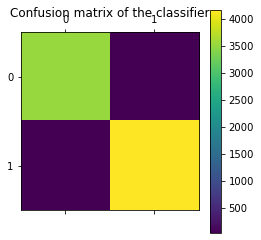

In [63]:
import pylab as pl
pl.matshow(cf)
pl.title("Confusion matrix of the classifier")
pl.colorbar()
pl.show()

Text(0.5, 1.0, 'Confusion Matrix for PassiveAggressiveClassifier')

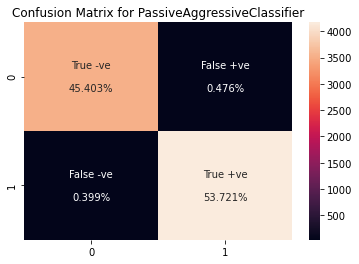

In [64]:
import matplotlib as plt
import seaborn as sns
group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
group_percentages = ["{0:.3%}".format(value) for value in
                    cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n\n{v2}"
          for v1,v2 in
          zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#ax = plt.axes()
ax=sns.heatmap(cf, annot = labels, fmt = '')
ax.set_title('Confusion Matrix for PassiveAggressiveClassifier')

In [65]:
print(len(tfvect.vocabulary_))
#Total no of vocabularies identified

94810


In [66]:
#Pickle in Python is primarily used in serializing and deserializing a Python object structure.
#In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
import pickle

In [67]:
#pickle.dump(pac,open('model_1.pkl', 'wb'))-direct method
with open('model_1.pkl','wb') as handle:
    pickle.dump(classifier,handle,protocol=pickle.HIGHEST_PROTOCOL)
#handle-file object returned after opening the model
#pickle.HIGHEST_PROTOCOL indicates the highest version of pickle

In [68]:
print(len(tfvect.vocabulary_))

94810


In [69]:
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('nbmodel', MultinomialNB())])
#multinomial naive bayes algorithm is a probabilistic learning method used in NLP

In [70]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nbmodel', MultinomialNB())])

In [71]:
score = pipeline.score(x_test, y_test)
print('Accuracy', score)
#score-returns a score or a loss

Accuracy 0.9175894926603142


In [72]:
pred = pipeline.predict(x_test)

In [73]:
print(classification_report(y_test, pred))
#to measure the quality of predictions
#precisions-measure of classifier's exactness
#recall-measure of classifier's completeness
#f1-score=weighted harmonic mean of precision and recall
#support-number of actual occurences of class in specified dataset

              precision    recall  f1-score   support

        Fake       0.94      0.87      0.91      3563
        Real       0.90      0.96      0.93      4203

    accuracy                           0.92      7766
   macro avg       0.92      0.91      0.92      7766
weighted avg       0.92      0.92      0.92      7766



In [74]:
print(len(tfvect.vocabulary_))

94810


In [75]:
print(confusion_matrix(y_test, pred))
cf_pipe= confusion_matrix(y_test, pred)

[[3109  454]
 [ 186 4017]]


Text(0.5, 1.0, 'Confusion Matrix for Pipeline Model')

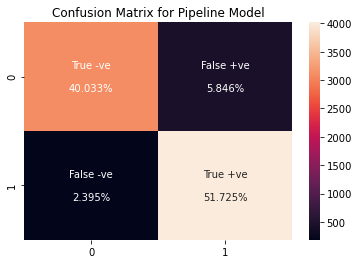

In [76]:
import seaborn as sns
import matplotlib as plt
import seaborn as sns
group_names = ['True -ve', 'False +ve', 'False -ve', 'True +ve']
group_percentages = ["{0:.3%}".format(value) for value in
                    cf_pipe.flatten()/np.sum(cf_pipe)]
labels = [f"{v1}\n\n{v2}"
          for v1,v2 in
          zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
#ax = plt.axes()
ax=sns.heatmap(cf_pipe, annot = labels, fmt = '')
ax.set_title('Confusion Matrix for Pipeline Model')

In [77]:
import pickle

In [78]:
with open('model.pkl','wb') as handle:
    pickle.dump(pipeline,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [79]:
#Logistic Regression, to model the probability of certain class or event existing
from sklearn.linear_model import LogisticRegression

In [80]:
LR = LogisticRegression()
LR.fit(tfid_x_train,y_train)
#fits the training dataset to the object

LogisticRegression()

In [81]:
#given a trained model it predicts the new set of data,it returns learned label of each object in an array
pred_lr=LR.predict(tfid_x_test)

In [82]:
#Returns the co-efficient of the determination of the prediction-model accuracy level
LR.score(tfid_x_test, y_test)

0.9793973731650786

In [83]:
#comparison between dataset class and predicted values
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        Fake       0.98      0.97      0.98      3563
        Real       0.98      0.98      0.98      4203

    accuracy                           0.98      7766
   macro avg       0.98      0.98      0.98      7766
weighted avg       0.98      0.98      0.98      7766



In [84]:
print(confusion_matrix(y_test, pred_lr))

[[3470   93]
 [  67 4136]]


In [85]:
#Decision tree classification
from sklearn.tree import DecisionTreeClassifier

In [86]:
DT = DecisionTreeClassifier()
DT.fit(tfid_x_train, y_train)

DecisionTreeClassifier()

In [87]:
pred_dt = DT.predict(tfid_x_test)

In [88]:
DT.score(tfid_x_test, y_test)

0.993561679114087

In [89]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      3563
        Real       0.99      0.99      0.99      4203

    accuracy                           0.99      7766
   macro avg       0.99      0.99      0.99      7766
weighted avg       0.99      0.99      0.99      7766



In [90]:
print(confusion_matrix(y_test, pred_dt))

[[3539   24]
 [  26 4177]]


In [91]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
GBC = GradientBoostingClassifier(random_state=0)
#random_state=0 controls the verbosity(fact and quality of using more words than needed) while splitting and prediction
GBC.fit(tfid_x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [93]:
pred_gbc = GBC.predict(tfid_x_test)

In [94]:
GBC.score(tfid_x_test, y_test)

0.9949781097089879

In [95]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      3563
        Real       0.99      1.00      1.00      4203

    accuracy                           0.99      7766
   macro avg       1.00      0.99      0.99      7766
weighted avg       0.99      0.99      0.99      7766



In [96]:
print(confusion_matrix(y_test, pred_gbc))

[[3539   24]
 [  15 4188]]


In [97]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(tfid_x_train, y_train)

RandomForestClassifier(random_state=0)

In [99]:
pred_rfc = RFC.predict(tfid_x_test)

In [100]:
RFC.score(tfid_x_test, y_test)

0.9783672418233325

In [101]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98      3563
        Real       0.97      0.99      0.98      4203

    accuracy                           0.98      7766
   macro avg       0.98      0.98      0.98      7766
weighted avg       0.98      0.98      0.98      7766



In [102]:
print(confusion_matrix(y_test, pred_rfc))

[[3444  119]
 [  49 4154]]


In [103]:
#Manual Testing
def output_lable(n):
    if n == "Fake":
        return "Fake News"
    elif n == "Real":
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    #creates a dataframe
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = tfvect.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_pac = classifier.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {} ".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_pac[0])))

In [104]:
news = str(input())
manual_testing(news)

I have noticed that a lot of the methods focus on short texts, probably because it is the hard problem to solve: if you have a lot of text, it is really easy to detect languages (e.g. one could just use a dictionary!). However, this makes it difficult to find for an easy and suitable method for long texts.


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News 
PAC Prediction: Fake News 
